**Lab 2.1**

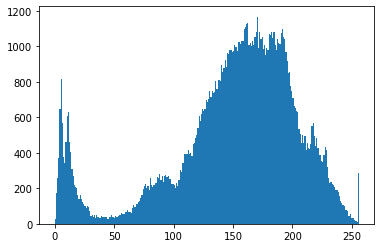

In [4]:
#using Matplotlib

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('highkey.png',0)

#plt.style.use('ggplot')
plt.hist(img.ravel(),256,[0,256]); plt.show()

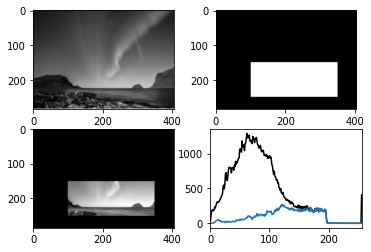

In [7]:
img = cv2.imread('middle_key.png',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[150:250, 100:350] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full, color = 'k'), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [99]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

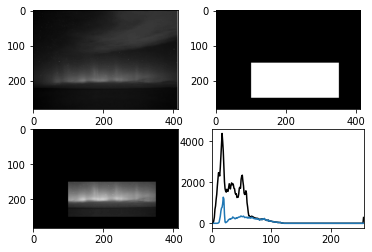

In [98]:
img = cv2.imread('dark_keySky.png',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[150:250, 100:350] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full, color = 'k'), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

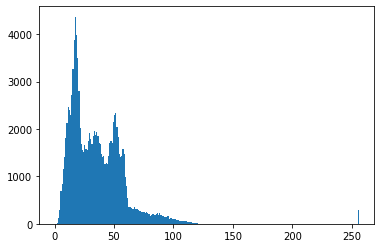

In [15]:
#using Matplotlib

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('dark_keySky.png',0)

#plt.style.use('ggplot')
plt.hist(img.ravel(),256,[0,256]); plt.show()

- Does the obtained image contain any artifact? If so, what are the artifact associated with histogram equalization? 

ANS : The sky should not have any noise 

- Explain why histogram equalization of a digital image cannot always lead to satisfactory
results.

ANS : To help distribute the intensity to make the low contrast image to high contrast image.

**Lab 2.2.a**

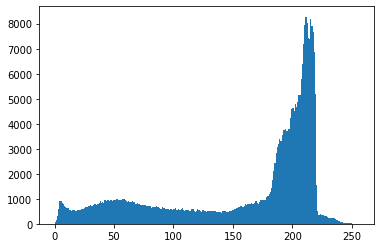

In [18]:
#using Matplotlib

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('แมว-89.jpg',0)

#plt.style.use('ggplot')
plt.hist(img.ravel(),256,[0,256]); plt.show()

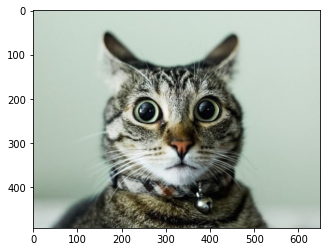

In [56]:
img = cv2.imread('แมว-89.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

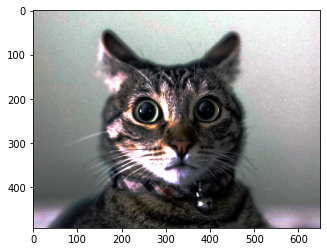

In [63]:
b, g, r = cv2.split(img)
equ_1= cv2.equalizeHist(b)
equ_2 = cv2.equalizeHist(g)
equ_3 = cv2.equalizeHist(r)
img = cv2.merge((equ_1,equ_2,equ_3))
plt.imshow(img)
plt.show()

- Observer the results and explain why applying the scalar contrast
transformation to each image channel independently is not a good idea.

ANS : because  Red, Green, and Blue components of an RGB image changes the relative distributions of the color channels

**Lab 2.2.b**

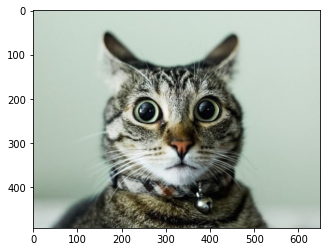

In [94]:
img = cv2.imread('แมว-89.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

AttributeError: ignored

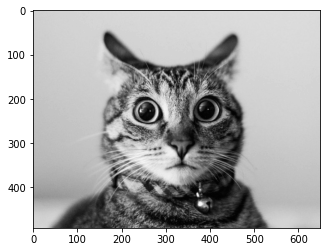

In [93]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('แมว-89.jpg',0)
plt.imshow(img,'gray')
split_img=cv2.split(img)
img_yuv=cv2.cvtColor(image,cv2.COLOR_BRG2YUV)
cv2.imshow('y channel',img)
cv2.imshow('u channel',img)
cv2.imshow('v channel',img)
plt.imshow(img_yuv)

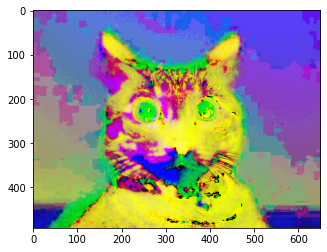

In [85]:
img = cv2.imread('แมว-89.jpg',1)
img_hsv = cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)
equ_4 = cv2.equalizeHist(h)
equ_5 = cv2.equalizeHist(s)
equ_6 = cv2.equalizeHist(v)
image_hsv = cv2.merge((equ_4,equ_5,equ_6))
plt.imshow(image_hsv)
plt.show()

- Let’s first change the color model from RGB to HSV or YUV. And then stretch the contrast in the V image and use the new V values together with the original H and S values or Y and U.Implement the same contrast stretching algorithm. Why is this contrast stretching method leading to reasonable results?

ANS : HSV can seperate the intensity of color and YUV like the human perception and RGB used for the computer machine

**LAB 2.3**

In [52]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


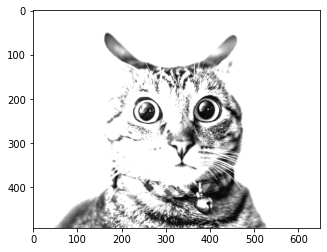

In [92]:
img2 = cv2.imread('แมว-89.jpg',0)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
r1 = 100
s1 = 1
r2 = 199
s2 = 250
pixelVal_vec = np.vectorize(pixelVal)
contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
plt.imshow(contrast_stretched)
plt.show()

- Then, transform an input image using your chosen transform and parameters. Display and discuss the input and output images. 

ANS : Use the increasing linear transform to stretching the intesity of image